In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

files = [f for f in os.listdir() if '.npy' in f]

In [3]:
def split_treatment(files, tr):
    Veh = [f for f in files if 'Vehicle' in f]
    ABC = [f for f in files if 'ChABC' in f]
    
    if tr == 'Vehicle':
        return Veh
    
    elif tr == 'ChABC':
        return ABC

def split_side(files, side):
    Lside = [f for f in files if 'Lside' in f]
    Rside = [f for f in files if 'Rside' in f]
    
    if side == 'L':
        return Lside
    
    elif side == 'R':
        return Rside

def split_region(files, reg):
    PFC = [f for f in files if 'PFC' in f]
    HPC = [f for f in files if 'HPC' in f]
    
    if reg == 'PFC':
        return PFC
    
    elif reg == 'HPC':
        return HPC
    
def split_reward(files, rew):
    rw = [f for f in files if 'Rewarded' in f]
    unrw = [f for f in files if 'Unrewarded' in f]
    
    if rew == 'Rewarded':
        return rw
    
    if rew == 'Unrewarded':
        return unrw
    
    
def split_frange(files, frange):
    low = [f for f in files if '1-25' in f]
    med = [f for f in files if '1-40' in f]
    hi = [f for f in files if '1-120' in f]
    
    if frange == 'low':
        return low
    
    if frange == 'med':
        return med
    
    elif frange == 'hi':
        return hi

def get_data(files, tr, reg, side, rew, frange):
    
    # treatment
    by_tr = split_treatment(files, tr)
    
    # region
    by_reg = split_region(by_tr, reg)
    
    # side
    by_side = split_side(by_reg, side)
    
    # reward
    by_rw = split_reward(by_side, rew)
    
    # frange
    by_frange = split_frange(by_rw, frange)
    
    assert len(by_frange) == 1
    print(by_frange)
    
    return np.load(np.array(by_frange).item(), allow_pickle=True)

In [4]:
def plot_spect(normavg, tr, reg, side, rew, frange, day='VR5'):
    f, ax = plt.subplots(1,1)
    f.set_figheight(3)
    f.set_figwidth(5)
    
    pre_bline=0.1
    epoch_len=2
    fs=2000

    fs = 2000
    time = np.arange(-1*pre_bline, epoch_len/2, 1/fs)*1000     # *1000 to get into ms
    
    if frange == 'low':
        fr = '1-25 Hz'
        freqs = np.arange(1,26)
        vmax=5
    
    if frange == 'med':
        fr = '1-40 Hz'
        freqs = np.arange(1,41)
        vmax=3
        
    elif frange == 'hi':
        fr = '10-100 Hz'
        freqs = np.arange(10,101)
        normavg = normavg[10:-19]
        vmax=3
    
    if side =='R':
        sd = 'Rside'
        
    elif side == 'L':
        sd = 'Lside'
        
    title = ' '.join([day, tr, reg, sd, '\n', rew, fr])
    
    print(len(normavg))
    print(len(freqs))

    n = 50
    vmin = 0
    levels = np.linspace(vmin, vmax, n+1)

    cs = ax.contourf(time, freqs, normavg, levels=levels, cmap='magma')
    ax.set_title(title, size=16)
    ax.set_xlabel('Time (ms), press @ t=0', fontsize=16)
    ax.set_ylabel('Frequency (Hz)', fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticks(range(0,801,200))
    cb = f.colorbar(cs, ax=ax, shrink=0.9, ticks=np.linspace(0,vmax, 7))
    cb.ax.tick_params(labelsize=16)
    cb.ax.set_yticklabels(np.round(np.linspace(0,vmax, 7),1))  # vertically oriented colorbar
    
    title = ' '.join([day, tr, reg, sd, rew, fr])
    #plt.tight_layout()
    plt.savefig(title+'.png', dpi=600, bbox_inches = "tight")

['VR5_Vehicle PFC_Rside, Rewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_Vehicle PFC_Rside, Rewarded 1-120 Hz Spectrogram.npy']
91
91
['VR5_ChABC PFC_Rside, Rewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_ChABC PFC_Rside, Rewarded 1-120 Hz Spectrogram.npy']
91
91


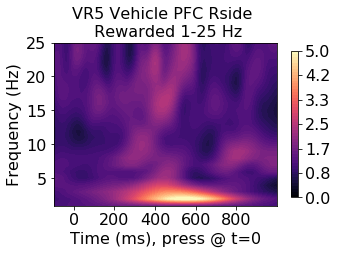

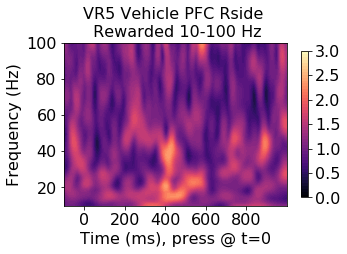

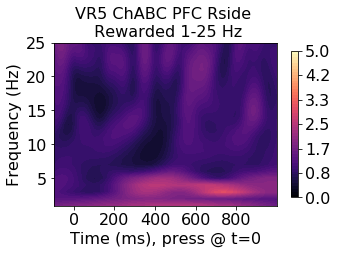

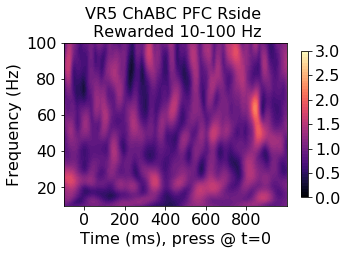

In [5]:
kwargs = {'tr':'Vehicle', 'reg':'PFC', 'side':'R', 'rew':'Rewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'Vehicle', 'reg':'PFC', 'side':'R', 'rew':'Rewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'PFC', 'side':'R', 'rew':'Rewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'PFC', 'side':'R', 'rew':'Rewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

['VR5_Vehicle PFC_Rside, Unrewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_Vehicle PFC_Rside, Unrewarded 1-120 Hz Spectrogram.npy']
91
91
['VR5_ChABC PFC_Rside, Unrewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_ChABC PFC_Rside, Unrewarded 1-120 Hz Spectrogram.npy']
91
91


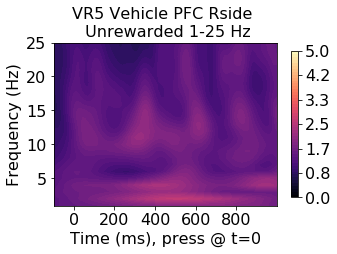

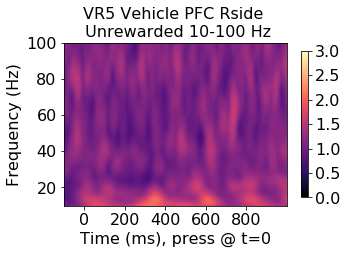

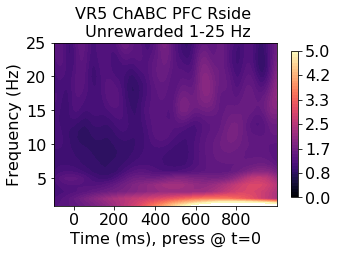

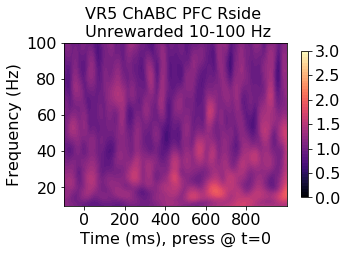

In [6]:
kwargs = {'tr':'Vehicle', 'reg':'PFC', 'side':'R', 'rew':'Unrewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'Vehicle', 'reg':'PFC', 'side':'R', 'rew':'Unrewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'PFC', 'side':'R', 'rew':'Unrewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'PFC', 'side':'R', 'rew':'Unrewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

['VR5_Vehicle HPC_Rside, Rewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_Vehicle HPC_Rside, Rewarded 1-120 Hz Spectrogram.npy']
91
91
['VR5_ChABC HPC_Rside, Rewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_ChABC HPC_Rside, Rewarded 1-120 Hz Spectrogram.npy']
91
91


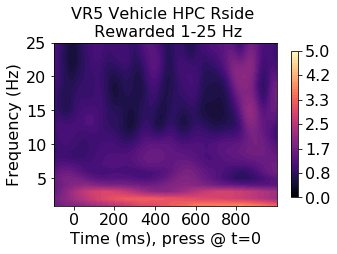

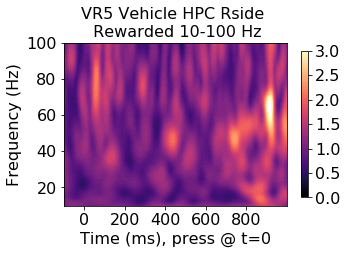

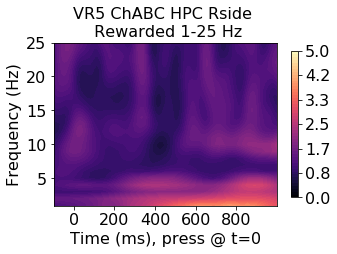

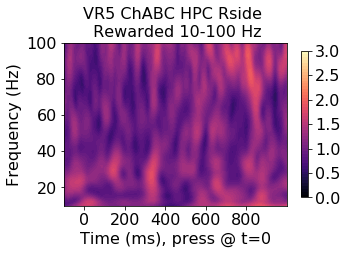

In [8]:
kwargs = {'tr':'Vehicle', 'reg':'HPC', 'side':'R', 'rew':'Rewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'Vehicle', 'reg':'HPC', 'side':'R', 'rew':'Rewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'HPC', 'side':'R', 'rew':'Rewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'HPC', 'side':'R', 'rew':'Rewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

['VR5_Vehicle HPC_Rside, Unrewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_Vehicle HPC_Rside, Unrewarded 1-120 Hz Spectrogram.npy']
91
91
['VR5_ChABC HPC_Rside, Unrewarded 1-25 Hz Spectrogram.npy']
25
25
['VR5_ChABC HPC_Rside, Unrewarded 1-120 Hz Spectrogram.npy']
91
91


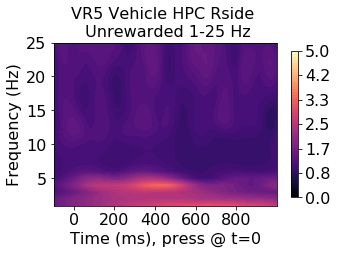

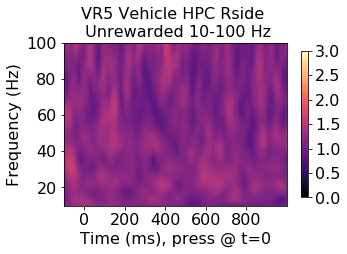

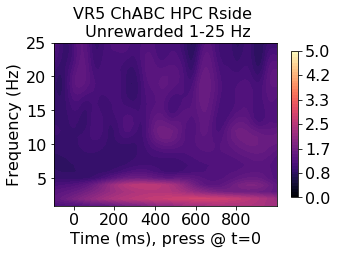

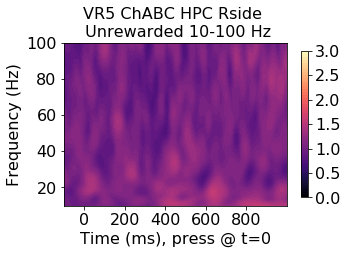

In [7]:
kwargs = {'tr':'Vehicle', 'reg':'HPC', 'side':'R', 'rew':'Unrewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'Vehicle', 'reg':'HPC', 'side':'R', 'rew':'Unrewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'HPC', 'side':'R', 'rew':'Unrewarded', 'frange':'low'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)

kwargs = {'tr':'ChABC', 'reg':'HPC', 'side':'R', 'rew':'Unrewarded', 'frange':'hi'}
dat = get_data(files, **kwargs)
plot_spect(dat, **kwargs)